<a href=#field>Field test</a>
  - <a href=#fly>On-the-fly</a>
  - <a href=#lookup>Lookup</a>
  - <a href=#tree>Tree</a>

# Benchmark for the core.cnn.CNN.predict method

In [3]:
import core.cnn as cnn
import importlib
from pathlib import Path
from os.path import expandvars
import time
from collections import defaultdict
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import math
from scipy.optimize import curve_fit
from scipy.spatial.distance import cdist
from scipy.spatial import cKDTree

In [187]:
importlib.reload(cnn)

<module 'core.cnn' from '/home/janjoswig/CNN/core/cnn.py'>

In [21]:
mpl.rc_file(
    f"{expandvars('$HOME/.config/matplotlib/matplotlibrc')}",
    use_default_template=False
)
mpl.rcParams['figure.figsize'] = 6.50128*0.5, 6.50128*0.5*0.618*1.1

In [3]:
ax_props = {
    "xlabel": None,
    "ylabel": None,
    "xlim": (-1.5, 1.5),
    "ylim": (-1.5, 1.5),
    "xticks": (),
    "yticks": (),
    "aspect": "equal"
}

<a name="field" />

# Field test

<a name="fly" />

## On-the-fly plain

### Test

In [ ]:
# clusters = None, method = "plain"

Configuration file found in /home/janjoswig
Execution time for call of fit():     0 hours, 0 minutes, 0.0050 seconds
recording: ... 
points                  100
radius_cutoff             1
cnn_cutoff                5
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00501204
dtype: object


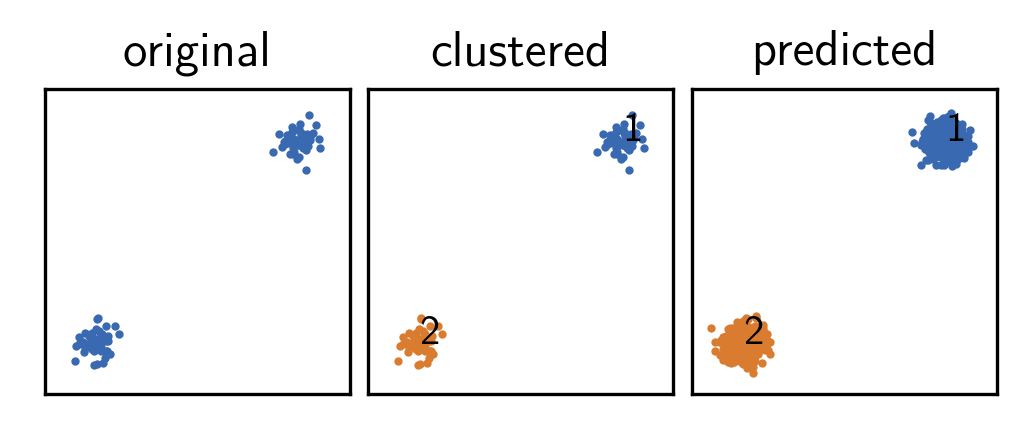

In [176]:
# Train set preparation
cobj = cnn.CNN(test=genblobs(1000), train=genblobs(100))
cobj.fit(1, 5)
cobj.predict(radius_cutoff=0.5, cnn_cutoff=10, behaviour="on-the-fly")

fig, Ax = plt.subplots(1, 3)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
cobj.evaluate(ax=Ax[2], ax_props=ax_props, mode="test")
Ax[0].set_title("original")
Ax[1].set_title("clustered")
Ax[2].set_title("predicted")
fig.tight_layout(pad=0.1)

In [ ]:
# clusters = [1], method = "plain"

Configuration file found in /home/janjoswig
Execution time for call of fit():     0 hours, 0 minutes, 0.0029 seconds
recording: ... 
points                  100
radius_cutoff             1
cnn_cutoff                5
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00289011
dtype: object


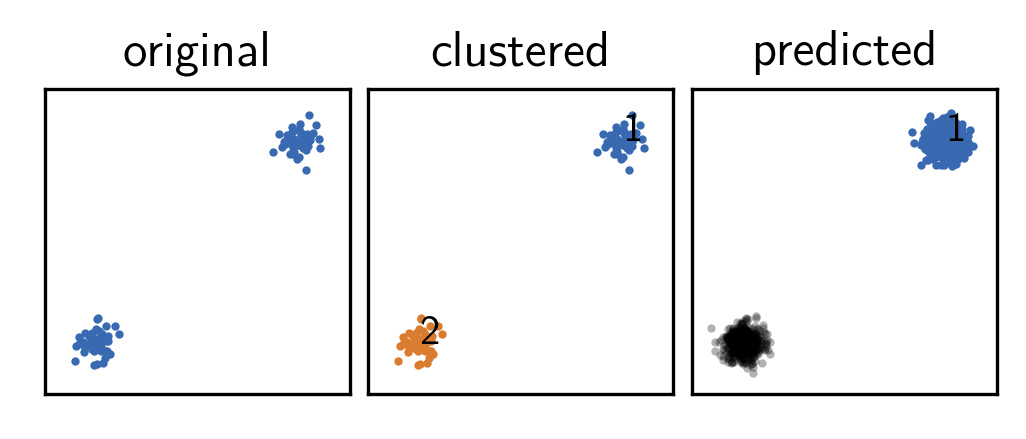

In [180]:
# Train set preparation
cobj = cnn.CNN(test=genblobs(1000), train=genblobs(100))
cobj.fit(1, 5)
cobj.predict(
    radius_cutoff=0.5, cnn_cutoff=10, behaviour="on-the-fly", clusters=[1]
    )

fig, Ax = plt.subplots(1, 3)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
cobj.evaluate(ax=Ax[2], ax_props=ax_props, mode="test")
Ax[0].set_title("original")
Ax[1].set_title("clustered")
Ax[2].set_title("predicted")
fig.tight_layout(pad=0.1)

### On-the-fly

In [32]:
system = Path("qcm07")

In [35]:
system = Path("qcw21")

In [5]:
otf = defaultdict(dict)

In [37]:
otf

defaultdict(dict,
            {100: defaultdict(list,
                         {1000: [0.07931852340698242, 0.07837581634521484],
                          2500: [0.2424030303955078, 0.19777679443359375],
                          5000: [0.40270471572875977, 0.4452972412109375],
                          10000: [0.7797925472259521, 0.7359685897827148],
                          25000: [1.8723366260528564, 1.8828394412994385],
                          50000: [3.6879069805145264, 3.666592597961426],
                          100000: [7.51310133934021, 7.544463872909546],
                          250000: [18.995071411132812, 19.16330885887146],
                          500000: [37.984429359436035, 38.734474897384644]}),
             1000: defaultdict(list,
                         {1000: [0.16264963150024414, 0.15012025833129883],
                          2500: [0.3713984489440918, 0.37079668045043945],
                          5000: [0.7343518733978271, 0.7312889099121094],
        

In [36]:
otf = np.load(system / "otf.npy", allow_pickle=True).item()

In [10]:
np.save(system / "otf", otf)

In [12]:
samples_test = [1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000]
# samples_test = [1000000]
samples_train = [100, 1000]


In [23]:
update_nesteddictlists(
    otf,
    benchmark(
        genblobs,
        mode='on-the-fly',
        samples_test=samples_test,
        samples_train=samples_train,
        )
    )

Benchmark mode on-the-fly...

Configuration file found in /home/janjoswig
Configuration file found in /home/janjoswig


<a name="lookup" />

## Lookup

### Test

In [181]:
# clusters = None

Configuration file found in /home/janjoswig
Execution time for call of fit():     0 hours, 0 minutes, 0.0027 seconds
recording: ... 
points                  100
radius_cutoff             1
cnn_cutoff                5
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00265479
dtype: object


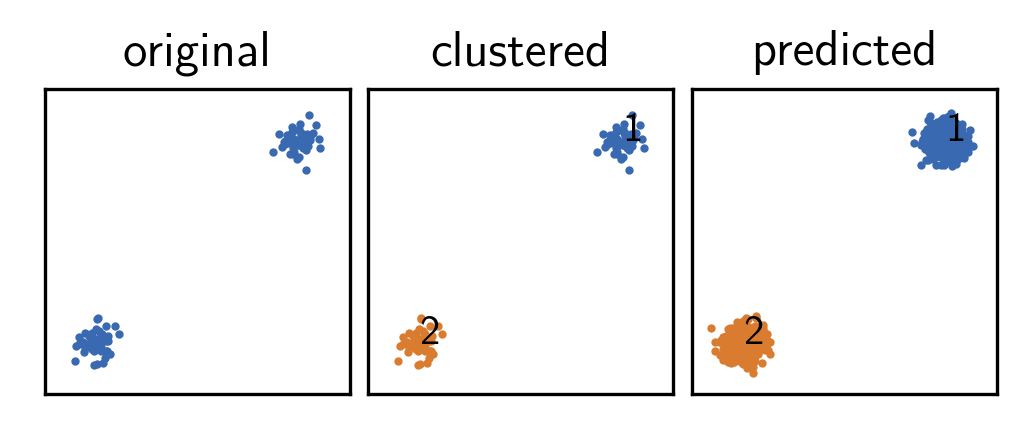

In [182]:
# Train set preparation
cobj = cnn.CNN(test=genblobs(1000), train=genblobs(100))
cobj.dist()
cobj.map()
cobj.fit(1, 5)
cobj.predict(radius_cutoff=0.5, cnn_cutoff=10, behaviour="lookup")

fig, Ax = plt.subplots(1, 3)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
cobj.evaluate(ax=Ax[2], ax_props=ax_props, mode="test")
Ax[0].set_title("original")
Ax[1].set_title("clustered")
Ax[2].set_title("predicted")
fig.tight_layout(pad=0.1)

In [ ]:
# Benchmark

In [9]:
system = Path("qcm07")

In [24]:
look = defaultdict(dict)

In [25]:
look

defaultdict(dict, {})

In [11]:
look = np.load(system / "look.npy", allow_pickle=True).item()

In [ ]:
np.save(system / "look", look)

In [12]:
samples_test = [1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000]
# samples_test = [1000000]
samples_train = [100, 1000]


In [ ]:
update_nesteddictlists(
    look,
    benchmark(
        genblobs,
        mode='lookup',
        samples_test=samples_test,
        samples_train=samples_train,
        )
    )

Benchmark mode lookup...

Configuration file found in /home/janjoswig


In [181]:
# clusters = None, memmap

Configuration file found in /home/janjoswig
Execution time for call of fit():     0 hours, 0 minutes, 0.0037 seconds
recording: ... 
points                 100
radius_cutoff            1
cnn_cutoff               5
member_cutoff            1
max_clusters          None
n_clusters               2
largest                0.5
noise                    0
time             0.0037024
dtype: object


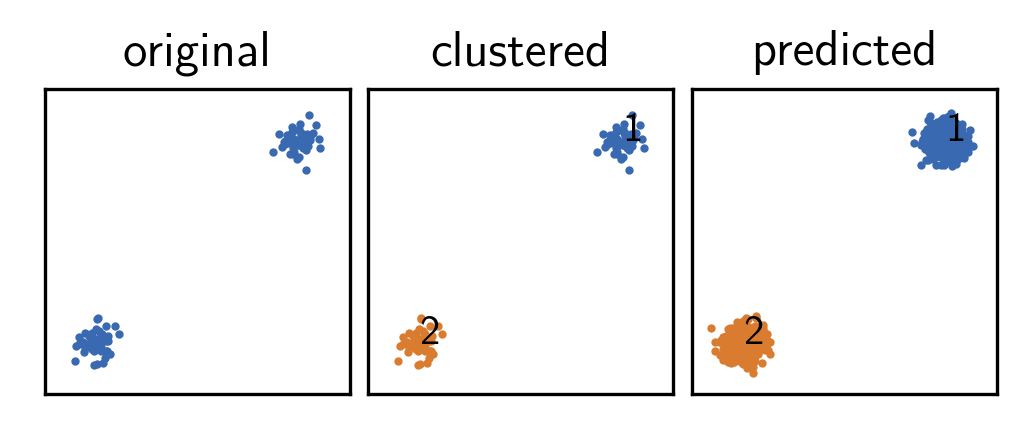

In [183]:
# Train set preparation
cobj = cnn.CNN(test=genblobs(1000), train=genblobs(100))
cobj.dist(mmap=True)
cobj.map(mmap=True)
cobj.fit(1, 5)
cobj.predict(radius_cutoff=0.5, cnn_cutoff=10, behaviour="lookup")

fig, Ax = plt.subplots(1, 3)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
cobj.evaluate(ax=Ax[2], ax_props=ax_props, mode="test")
Ax[0].set_title("original")
Ax[1].set_title("clustered")
Ax[2].set_title("predicted")
fig.tight_layout(pad=0.1)

In [ ]:
# Benchmark

In [9]:
system = Path("qcm07")

In [ ]:
lookmmap = defaultdict(dict)

In [ ]:
lookmmap

In [11]:
lookmmap = np.load(system / "lookmmap.npy", allow_pickle=True).item()

In [ ]:
np.save(system / "lookmmap", lookmmap)

In [12]:
samples_test = [1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000]
# samples_test = [1000000]
samples_train = [100, 1000]


In [ ]:
update_nesteddictlists(
    lookmmap,
    benchmark(
        map_kwargs={"mmap": True},
        dist_kwargs={"mmap": True},
        genblobs,
        mode='lookup',
        samples_test=samples_test,
        samples_train=samples_train,
        )
    )

<a name="tree" />

## Tree

In [191]:
importlib.reload(cnn)

<module 'core.cnn' from '/home/janjoswig/CNN/core/cnn.py'>

### Test

In [181]:
# clusters = None

Configuration file found in /home/janjoswig
Execution time for call of fit():     0 hours, 0 minutes, 0.0026 seconds
recording: ... 
points                  100
radius_cutoff           0.5
cnn_cutoff                5
member_cutoff             1
max_clusters           None
n_clusters                2
largest                 0.5
noise                     0
time             0.00257087
dtype: object


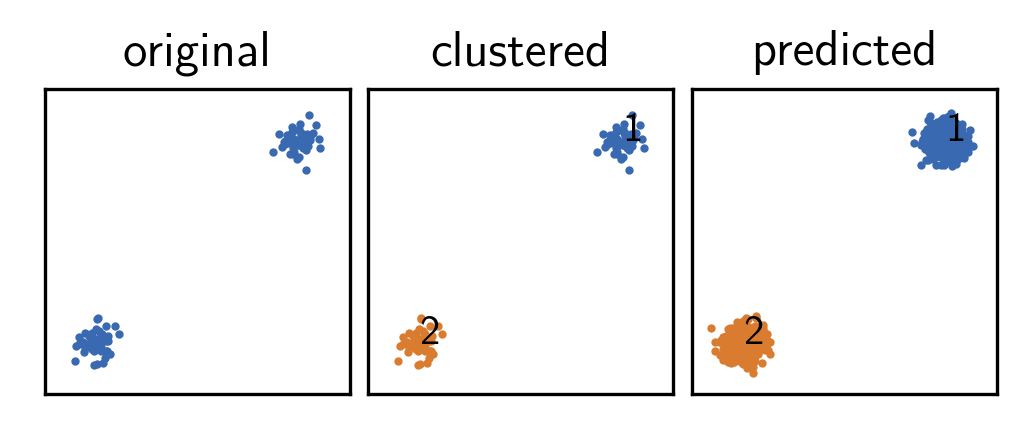

In [194]:
# Train set preparation
cobj = cnn.CNN(test=genblobs(1000), train=genblobs(100))
cobj.kdtree()
cobj.fit(0.5, 5)
cobj.predict(radius_cutoff=0.5, cnn_cutoff=10, behaviour="tree")

fig, Ax = plt.subplots(1, 3)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
cobj.evaluate(ax=Ax[2], ax_props=ax_props, mode="test")
Ax[0].set_title("original")
Ax[1].set_title("clustered")
Ax[2].set_title("predicted")
fig.tight_layout(pad=0.1)

Configuration file found in /home/janjoswig
Execution time for call of fit():     0 hours, 0 minutes, 14.4940 seconds
recording: ... 
points            10000
radius_cutoff       0.5
cnn_cutoff            5
member_cutoff         1
max_clusters       None
n_clusters            2
largest             0.5
noise                 0
time             14.494
dtype: object


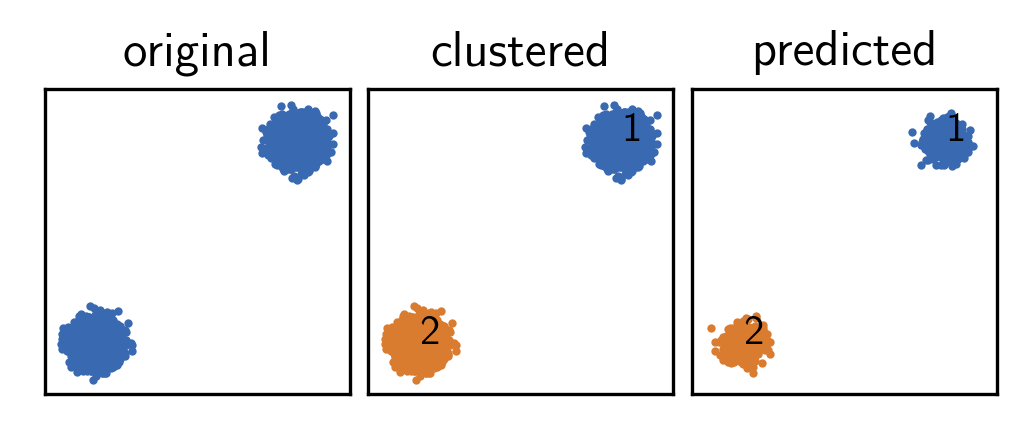

In [237]:
# Train set preparation
cobj = cnn.CNN(test=genblobs(1000), train=genblobs(10000))
cobj.kdtree()
cobj.fit(0.5, 5)
cobj.predict(radius_cutoff=0.5, cnn_cutoff=10, behaviour="tree")

fig, Ax = plt.subplots(1, 3)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
cobj.evaluate(ax=Ax[2], ax_props=ax_props, mode="test")
Ax[0].set_title("original")
Ax[1].set_title("clustered")
Ax[2].set_title("predicted")
fig.tight_layout(pad=0.1)

### Benchmark

In [213]:
system = Path("qcw21")

### Tree 16 1 Core

In [ ]:
t_tree = defaultdict(dict)

In [39]:
t_tree

defaultdict(dict,
            {100: defaultdict(list,
                         {1000: [0.13988828659057617,
                           0.13787055015563965,
                           0.16576790809631348,
                           0.1404247283935547],
                          2500: [0.3620107173919678, 0.37540650367736816],
                          5000: [0.7099554538726807, 0.728980302810669],
                          10000: [1.4095406532287598, 1.3953661918640137],
                          25000: [3.4658732414245605, 3.5411829948425293],
                          50000: [6.857202768325806, 6.757010221481323],
                          100000: [13.591985940933228, 13.869783639907837],
                          250000: [34.42792749404907, 34.70661687850952],
                          500000: [68.5639750957489, 68.74650859832764]}),
             1000: defaultdict(list,
                         {1000: [0.28026628494262695, 0.27110910415649414],
                          2500: [0.6660

In [38]:
t_tree = np.load(system / "t_tree.npy", allow_pickle=True).item()

In [264]:
np.save(system / "t_tree", t_tree)

In [247]:
samples_test = [1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000]
# samples_test = [1000000]
samples_train = [100, 1000]


In [ ]:
update_nesteddictlists(
    t_tree, # leafsize 16, 1 core
    benchmark(
        genblobs,
        mode='tree',
        samples_test=samples_test,
        samples_train=samples_train,
        )
    )

### Tree 16 1 Core

In [252]:
t_tree_2 = defaultdict(dict)

In [253]:
t_tree_2 

defaultdict(dict, {})

In [254]:
t_tree_2  = np.load(system / "t_tree_2 .npy", allow_pickle=True).item()

FileNotFoundError: [Errno 2] No such file or directory: 'qcw21/t_tree_2 .npy'

In [255]:
np.save(system / "t_tree_2 ", t_tree_2 )

In [256]:
samples_test = [1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000]
# samples_test = [1000000]
samples_train = [100, 1000]


In [258]:
update_nesteddictlists(
    t_tree_2, # leafsize 16, 1 core
    benchmark(
        genblobs,
        mode='tree',
        tree_kwargs={"n_jobs": 2},
        samples_test=samples_test,
        samples_train=samples_train,
        )
    )

Benchmark mode tree...

Configuration file found in /home/janjoswig


TypeError: __init__() got an unexpected keyword argument 'n_jobs'

[1.43761701e-04 9.96547450e-01] [4.22017763e-06 2.27189560e-03]
[6.67843010e-05 1.01058768e+00] [1.87374246e-06 2.17052101e-03]
[2.35450909e-04 1.00936961e+00] [3.06484887e-06 1.00705183e-03]
[1.50724677e-04 9.98683135e-01] [2.24071556e-06 1.15047345e-03]


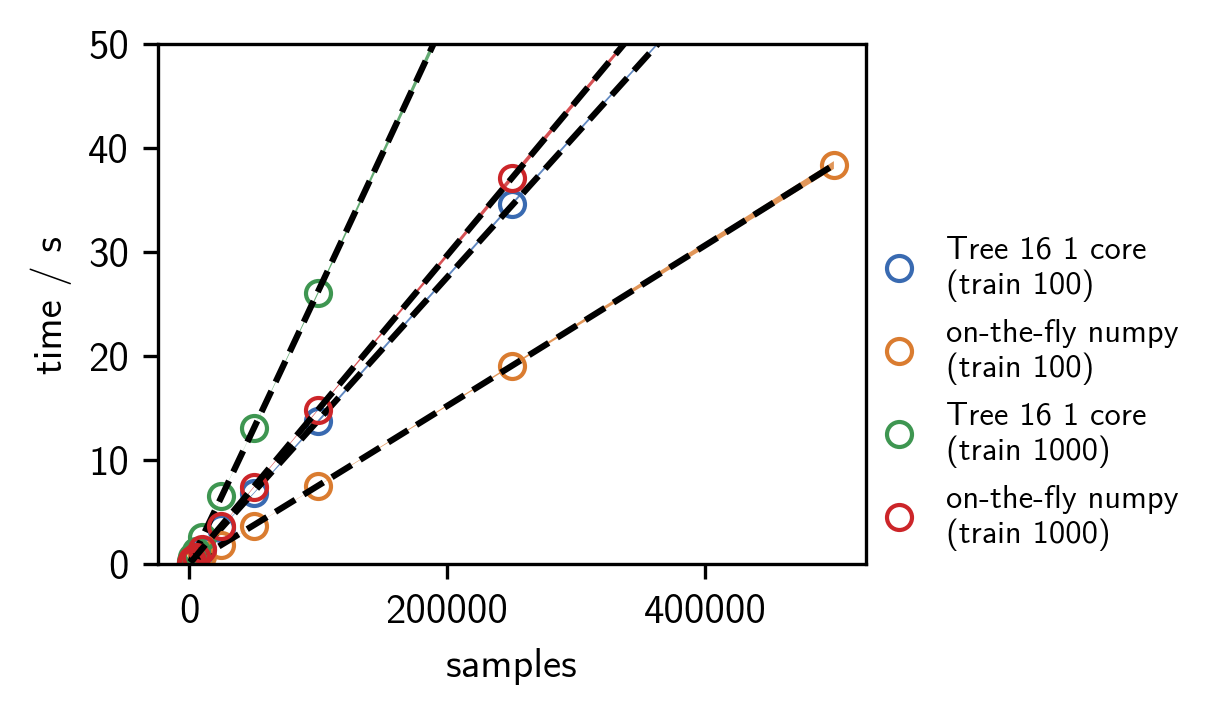

In [44]:
fig, ax = plt.subplots(figsize=(6.50128*0.6, 6.50128*0.5*0.618*1.1))
_, _, line, _, b = plot_times(t_tree[100], ax=ax)
_, _, line2, _, b2 = plot_times(otf[100], ax=ax)
_, _, line3, _, b = plot_times(t_tree[1000], ax=ax)
_, _, line4, _, b2 = plot_times(otf[1000], ax=ax)
# _, _, line3, _, b3 = plot_times(times_naive_mm, ax=ax)
# _, _, line4, _, b4 = plot_times(times_naive_mm_map, ax=ax)
# _, _, line5, _, b5 = plot_times(times_naive_kd, ax=ax)
# _, _, line6, _, b6 = plot_times(times_naive_kd_2, ax=ax)
# _, _, line7, _, b7 = plot_times(times_naive_kd40, ax=ax)
# _, _, line8, _, b8 = plot_times(times_naive_kd_multi, ax=ax) #40
ax.legend(
    [line[0],
     line2[0],
    line3[0],
     line4[0],],
    ['Tree 16 1 core\n(train 100)',
     'on-the-fly numpy\n(train 100)',
    'Tree 16 1 core\n(train 1000)',
     'on-the-fly numpy\n(train 1000)',],
    frameon=False,
    fontsize=8,
    handlelength=1.2,
    loc=(1, 0)
)
ax.set(**{
    "ylim": (0, 50)
})
fig.tight_layout(pad=0.1)
# fig.savefig(system / "field_bm_2.png")
fig.savefig("/home/janjoswig/Documents/Presentation/cnn/figures/compare2.png")

# Helper

In [14]:
def update_dictlists(a, b):
    for k, v in b.items():
        a[k].extend(v)

In [20]:
def scale(x, y, newx):
    def growth(n, a, b):
        return a*np.power(n, b)
    
    try:
        popt, pcov = curve_fit(growth, x, y, p0=(0, 2))
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        # return growth(newx, *popt), (popt[1], perr[1])
        return growth(newx, *popt), (popt[1], perr[1])
    except RuntimeError as error:
        print(error)

In [18]:
def plot_times(times, ax=None, line_props=None, fill_props=None,
               ax_props=None, fit_props=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
        
    line_props_defaults = {
        "lw": 0,
        "marker": 'o',
        "markerfacecolor": 'none',
        }
    
    if line_props is not None:
        line_props_defaults.update(line_props)
        
    fit_props_defaults = {
        "linestyle": '--',
        "color": 'k'
        }
    
    if fit_props is not None:
        fit_props_defaults.update(fit_props)
        
    ax_props_defaults = {
        "xlabel": "samples",
        "ylabel": 'time / s'
        }
    
    if fit_props is not None:
        fit_props_defaults.update(fit_props)

        
    fill_props_defaults = {
        "edgecolor": "none",
        "alpha": 0.8,
        }
    
    if fill_props is not None:
        fill_props_defaults.update(fill_props)
        
    # means = {k: np.mean(v) for k, v in times.items()}
    # stds = {k: np.std(v) for k, v in times.items()}
    means = np.array([np.mean(v) for v in times.values()])
    stds = np.array([np.std(v) for v in times.values()])
    
    points = np.asarray(list(times.keys()))
    
    line = ax.plot(points, means, **line_props_defaults)
    filled = ax.fill_between(
        points, means - stds, means + stds, **fill_props_defaults
        )
    
    newx = np.linspace(points[0], points[-1])
    try:
        fity, b = scale(points, means, newx)
        ax.plot(newx, fity, **fit_props_defaults)
    except TypeError:
        b = (0., 0.)

    ax.set(**ax_props_defaults)
    
    return fig, ax, line, filled, b
    

In [20]:
# Benchmark function
def benchmark(generator, runs=2, samples_test=[1000], samples_train=[100],
              mode='on-the-fly', fit_kwargs=None, predict_kwargs=None,
              dist_kwargs=None, map_kwargs=None, tree_kwargs=None):
    
    dist_kwargs_ = {
        
        }
    if dist_kwargs is not None:
        dist_kwargs_.update(dist_kwargs)
        
    map_kwargs_ = {
        
        }
    if map_kwargs is not None:
        map_kwargs_.update(map_kwargs)

    tree_kwargs_ = {
        
        }
    if tree_kwargs is not None:
        tree_kwargs_.update(tree_kwargs)
    
    if fit_kwargs is None:
        fit_kwargs = {}
    
    fit_kwargs_defaults = {
        "radius_cutoff": 0.5,
        "cnn_cutoff": 5,
        "rec": False,
        "v": False,
        }
    
    fit_kwargs_ = defaultdict(dict)
    
    if predict_kwargs is None:
        predict_kwargs = {}
    
    predict_kwargs_defaults = {
        "radius_cutoff": 0.5,
        "cnn_cutoff": 5
        }
    
    predict_kwargs_ = defaultdict(dict)
    
    print(f"Benchmark mode {mode}...\n")
    times = defaultdict(dict)
    
    if mode == "on-the-fly":
        for n in samples_train:
            times[n] = defaultdict(list)
            cobj = cnn.CNN(train=generator(n))
            
            fit_kwargs_[n] = fit_kwargs_defaults
            try:
                fit_kwargs_[n].update(fit_kwargs[n])
            except KeyError:
                pass
            
            cobj.fit(**fit_kwargs_[n])
            
            for m in samples_test:
                
                cobj.test = generator(m)
                
                predict_kwargs_[n][m] = predict_kwargs_defaults
                predict_kwargs_[n][m]['behaviour'] = 'on-the-fly'
                try:
                    predict_kwargs_[n][m].update(predict_kwargs[n][m])
                except KeyError:
                    pass                

                for i in range(runs):
                    print(
f"n = {n:<8}, m = {m:<8} Run {i+1:>2} of {runs:<2}",
                        end='\r'
                        )
                    go = time.time()
                    cobj.predict(**predict_kwargs_[n][m])
                    stop = time.time()
                    stop -= go
                    times[n][m].append(stop)
                
    elif mode == "lookup":
        for n in samples_train:
            times[n] = defaultdict(list)
            cobj = cnn.CNN(train=generator(n))
            
            cobj.dist(**dist_kwargs_)
            fit_kwargs_[n] = fit_kwargs_defaults
            try:
                fit_kwargs_[n].update(fit_kwargs[n])
            except KeyError:
                pass
            
            cobj.fit(**fit_kwargs_[n])
            
            for m in samples_test:
                
                cobj.test = generator(m)
                cobj.map(**map_kwargs_)

                predict_kwargs_[n][m] = predict_kwargs_defaults
                predict_kwargs_[n][m]['behaviour'] = 'lookup'
                try:
                    predict_kwargs_[n][m].update(predict_kwargs[n][m])
                except KeyError:
                    pass                

                for i in range(runs):
                    print(
f"n = {n:>8}, m = {m:>8}, Run {i+1:>2} of {runs:<2}",
                        end='\r'
                        )
                    go = time.time()
                    cobj.predict(**predict_kwargs_[n][m])
                    stop = time.time()
                    stop -= go
                    times[n][m].append(stop)
                    
    elif mode == "tree":
        for n in samples_train:
            times[n] = defaultdict(list)
            cobj = cnn.CNN(train=generator(n))

            cobj.kdtree(**tree_kwargs_)
            fit_kwargs_[n] = fit_kwargs_defaults
            try:
                fit_kwargs_[n].update(fit_kwargs[n])
            except KeyError:
                pass

            cobj.fit(**fit_kwargs_[n])

            for m in samples_test:

                cobj.test = generator(m)
                cobj.map()

                predict_kwargs_[n][m] = predict_kwargs_defaults
                predict_kwargs_[n][m]['behaviour'] = 'tree'
                try:
                    predict_kwargs_[n][m].update(predict_kwargs[n][m])
                except KeyError:
                    pass                

                for i in range(runs):
                    print(
f"n = {n:>8}, m = {m:>8}, Run {i+1:>2} of {runs:<2}",
                        end='\r'
                        )
                    go = time.time()
                    cobj.predict(**predict_kwargs_[n][m])
                    stop = time.time()
                    stop -= go
                    times[n][m].append(stop) 
    
    else:
        raise ValueError()
    return times

In [18]:
def update_nesteddictlists(a, b):
    for k, v in b.items():
        if k not in a:
            a[k] = defaultdict(list)
        for l, w in v.items():
            a[k][l].extend(w)

In [19]:
def scale(x, y, newx):
    def growth(n, a, b):
        return a*np.power(n, b)
    
    try:
        popt, pcov = curve_fit(growth, x, y, p0=(0, 2))
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        # return growth(newx, *popt), (popt[1], perr[1])
        return growth(newx, *popt), (popt[1], perr[1])
    except RuntimeError as error:
        print(error)

In [212]:
t

defaultdict(dict,
            {1: defaultdict(list, {1: ['a', 'a'], 2: ['b', 'c', 'b', 'c']})})

In [ ]:
def plot_times(times, ax=None, line_props=None, fill_props=None,
               ax_props=None, fit_props=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
        
    line_props_defaults = {
        "lw": 0,
        "marker": 'o',
        "markerfacecolor": 'none',
        }
    
    if line_props is not None:
        line_props_defaults.update(line_props)
        
    fit_props_defaults = {
        "linestyle": '--',
        "color": 'k'
        }
    
    if fit_props is not None:
        fit_props_defaults.update(fit_props)
        
    ax_props_defaults = {
        "xlabel": "samples",
        "ylabel": 'time / s'
        }
    
    if fit_props is not None:
        fit_props_defaults.update(fit_props)

        
    fill_props_defaults = {
        "edgecolor": "none",
        "alpha": 0.8,
        }
    
    if fill_props is not None:
        fill_props_defaults.update(fill_props)
        
    # means = {k: np.mean(v) for k, v in times.items()}
    # stds = {k: np.std(v) for k, v in times.items()}
    means = np.array([np.mean(v) for v in times.values()])
    stds = np.array([np.std(v) for v in times.values()])
    
    points = np.asarray(list(times.keys()))
    
    line = ax.plot(points, means, **line_props_defaults)
    filled = ax.fill_between(
        points, means - stds, means + stds, **fill_props_defaults
        )
    
    newx = np.linspace(points[0], points[-1])
    try:
        fity, b = scale(points, means, newx)
        ax.plot(newx, fity, **fit_props_defaults)
    except TypeError:
        b = (0., 0.)

    ax.set(**ax_props_defaults)
    
    return fig, ax, line, filled, b
    

In [211]:
update_nesteddictlists(t, z)

# Scratch

In [62]:
mpl.rc_file(
    f"{expandvars('$HOME/.config/matplotlib/matplotlibrc')}",
    use_default_template=False
)
mpl.rcParams['figure.figsize'] = 6.50128*0.5, 6.50128*0.5*0.618*1.1

In [38]:
# Benchmark function
def benchmark(generator, calculator, distanceprovider=None,
    runs=2, samples=[1000], mode='ds',
    **kwargs):
    
    print(f"Benchmark mode {mode}...\n")
    times = defaultdict(list)
    
    if mode == "ds":
        for n in samples:
            data = generator(n)

            for i in range(runs):
                print(f"n = {n:<8} Run {i+1:>2} of {runs:<2}", end='\r')
                go = time.time()
                _ = calculator(data, **kwargs)
                stop = time.time()
                stop -= go
                times[n].append(stop)
                
    elif mode == 'mm':
        for n in samples:
            data = generator(n)
            
            mapm = distanceprovider(data, train)
            
            for i in range(runs):
                print(f"n = {n:<8} Run {i+1:>2} of {runs:<2}", end='\r')
                go = time.time()
                _ = calculator(data, mapm, **kwargs)
                stop = time.time()
                stop -= go
                times[n].append(stop)
                
    elif mode == 'kd':
        for n in samples:
            data = generator(n)
            
            for i in range(runs):
                print(f"n = {n:<8} Run {i+1:>2} of {runs:<2}", end='\r')
                go = time.time()
                _ = calculator(data, tree, **kwargs)
                stop = time.time()
                stop -= go
                times[n].append(stop)         
    
    else:
        raise ValueError()
    return times

<a name="e1" />

# Benchmark environment 1

In [22]:
# Data generation
def genblobs(n):
    blobs, _ = datasets.make_blobs(
        centers=[[-10, -10], [10, 10]],
        n_samples=n,
        random_state=10
    )
    return StandardScaler().fit_transform(blobs)

In [ ]:
# Train set preparation
cobj = cnn.CNN(train=genblobs(100))
cobj.dist(mmap=True)
# cobj.dist()
cobj.fit(1, 5)
train = cobj.train[0]
labels = cobj.train_labels
dist = cobj.train_dist_matrix
tree = cKDTree(train)

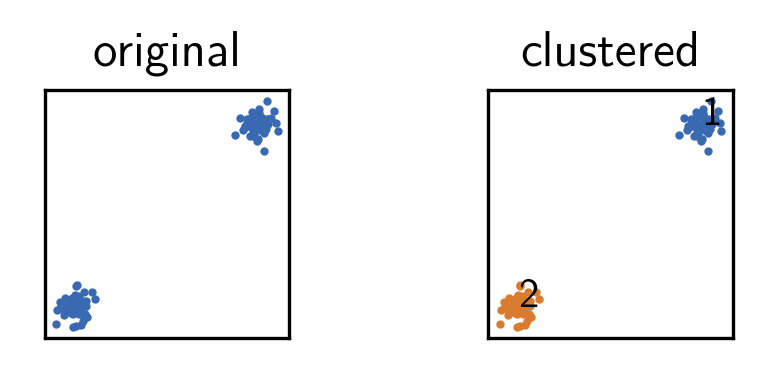

In [9]:
fig, Ax = plt.subplots(1, 2)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
Ax[0].set_title("original")
Ax[1].set_title("clustered")
fig.tight_layout(pad=0.1)

# How to predict assignments?

# Naive approach

In [13]:
# naive approach (from scratch): 
# loop over points in the test data
#     find all neighbours of this point in the train data
#     (find all neighbours of this point in the test data (see B below))
#     loop over all these neighbours
#         A) find all neighbours of this neighbour in the train set
#         check if the similarity criterion is fullfilled
#             1) Break and assign after first match
#             2) loop till the end and compare assignments
#         B) find all neighbours of this neighbour in the test set
#         check if the similarity criterion is fullfilled
#             1) Break and assign after first match
#             2) loop till the end and compare assignments
#
# Variant A1 (query from data sets)
def naive_ds(test, train=None, labels=None, query=None, check=None, r=None,
          c=None):
    testlabels = []
    for candidate in range(len(test)):
        testlabels.append(0)
        neighbours = query(candidate, r, of=test, look=train)
        for neighbour in neighbours:
            neighbour_neighbours = query(neighbour, r, of=train, look=train)
            match = check(neighbours, neighbour_neighbours, c)
            if match:
                testlabels[-1] = labels[neighbour]
                break
    return testlabels

# Variant A1 (query from map matrix)
def naive_mm(test, mapm, dist=None, train=None, labels=None, query=None, check=None, r=None,
          c=None):
    testlabels = []
    for candidate in range(len(test)):
        testlabels.append(0)
        neighbours = query(candidate, r, mapmatrix=mapm)
        for neighbour in neighbours:
            neighbour_neighbours = query(neighbour, r, mapmatrix=dist)
            match = check(neighbours, neighbour_neighbours, c)
            if match:
                testlabels[-1] = labels[neighbour]
                break
    return testlabels

# Variant A1 (query from tree)
def naive_kd(test, tree, dist=None, train=None, labels=None, query=None, check=None, r=None,
          c=None):
    testlabels = []
    for candidate in range(len(test)):
        testlabels.append(0)
        neighbours = query(candidate, r, of=test, tree=tree)
        for neighbour in neighbours:
            neighbour_neighbours = query(neighbour, r, of=train, tree=tree)
            match = check(neighbours, neighbour_neighbours, c)
            if match:
                testlabels[-1] = labels[neighbour]
                break
    return testlabels

# Naive approach - reverse

In [46]:
# naive approach (from scratch): 
# loop over points in the train data
#     find all neighbours of this point in the test data
#     (find all neighbours of this point in the train data (see A below))
#     loop over all these neighbours
#         A) find all neighbours of this neighbour in the train set
#         check if the similarity criterion is fullfilled
#             Assign, if matched (no check for ambigous assignment possible)
#         B) find all neighbours of this neighbour in the test set
#         check if the similarity criterion is fullfilled
#             Assign, if matched (no check for ambigous assignment possible)
#     
def naive(data):
    pass

# How to get neighbours?

## Mode: On the fly, directly from data sets (ds)

In [14]:
# naive approach: Calculate distances to potential neighbours from point
# index; of: data set in which the point is, look: data set in which to search
# for neighbours
# 
def get_neighbours_ds(point, r, of=None, look=None):
    r = r**2
    dim = len(look[0])
    neighbours = []
    for q, qpoint in enumerate(look):
        d = 0
        for e in range(dim):
            d += (qpoint[e] - of[point][e])**2
            if d < r:
                neighbours.append(q)
    return neighbours

In [15]:
def get_neighbours_ds_numpy(point, r, of=None, look=None):
    raise NotImplementedError()

In [16]:
def get_neighbours_ds_cdist(point, r, of=None, look=None):
    return np.where(cdist([of[point]], look) < r)[0]

In [17]:
def get_neighbours_kd(point, r, of=None, tree=None):
    return tree.query_ball_point(of[point], r)

In [18]:
def get_neighbours_kd_multi(point, r, of=None, tree=None):
    return tree.query_ball_point(of[point], r, n_jobs=-1)

In [81]:
def get_neighbours_kd_2(point, r, of=None, tree=None):
    return tree.query_ball_point(of[point], r, n_jobs=2)

In [19]:
# seperate distance calculation
def get_neighbours_mm(point, r, mapmatrix=None):
    return np.where(mapmatrix[point] < r)[0]

# How to check for similarity?

In [20]:
# Using a python set()
def check_set(a, b, c):
    # Check if a and b share at least c elements
    if len(set(a).intersection(b)) - 1 >= c:
        return True

# How to compute distance matrix

In [21]:
def d_cdist(A, B):
    return cdist(A, B)

In [22]:
def d_cdist_cobj_mmap(A, B):
    cobj.test = [A]
    cobj.map(mmap=True)
    return cobj.map_matrix

# Test functionality

Configuration file found in /home/janjoswig


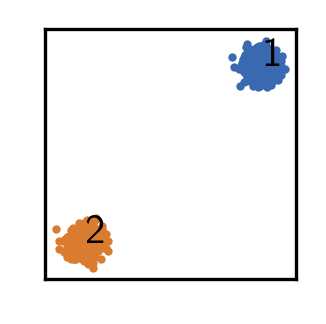

In [94]:
# Test for 1000 points (ds)
test = genblobs(1000)
tobj = cnn.CNN(test=test)
tobj.test_labels = np.asarray(naive_ds(
    test,
    train=train,
    labels=labels,
    query=get_neighbours_ds,
    check=check_set,
    r=1, c=5
))
tobj.labels2dict(mode="test")
tobj.evaluate(ax_props=ax_props, mode="test")

Configuration file found in /home/janjoswig


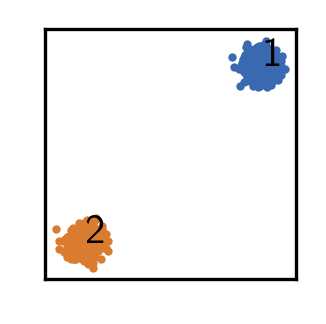

In [43]:
# Test for 1000 points (mm)
test = genblobs(1000)
mmap = d_cdist(test, train)
tobj = cnn.CNN(test=test)
tobj.test_labels = np.asarray(naive_mm(
    test,
    mmap,
    dist=dist,
    train=train,
    labels=labels,
    query=get_neighbours_mm,
    check=check_set,
    r=1, c=5
))
tobj.labels2dict(mode="test")
tobj.evaluate(ax_props=ax_props, mode="test")

Configuration file found in /home/janjoswig


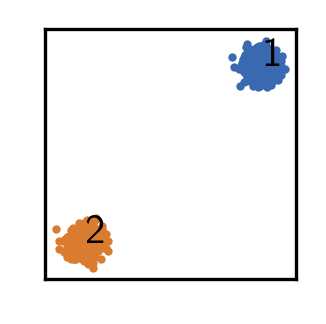

In [48]:
# Test for 1000 points (mm)
test = genblobs(1000)
mmap = d_cdist_cobj_mmap(test, train)
tobj = cnn.CNN(test=test)
tobj.test_labels = np.asarray(naive_mm(
    test,
    mmap,
    dist=dist,
    train=train,
    labels=labels,
    query=get_neighbours_mm,
    check=check_set,
    r=1, c=5
))
tobj.labels2dict(mode="test")
tobj.evaluate(ax_props=ax_props, mode="test")

Configuration file found in /home/janjoswig


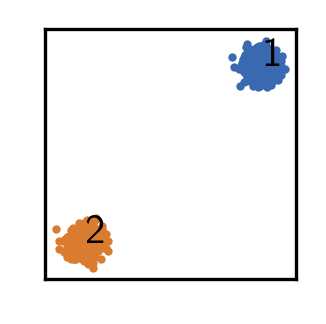

In [88]:
# Test for 1000 points (kd)
test = genblobs(1000)
tobj = cnn.CNN(test=test)
tobj.test_labels = np.asarray(naive_kd(
    test,
    tree,
    train=train,
    labels=labels,
    query=get_neighbours_kd,
    check=check_set,
    r=1, c=5
))
tobj.labels2dict(mode="test")
tobj.evaluate(ax_props=ax_props, mode="test")

## Helper

In [23]:
def update_dictlists(a, b):
    for k, v in b.items():
        a[k].extend(v)

In [24]:
def scale(x, y, newx):
    def growth(n, a, b):
        return a*np.power(n, b)
    
    try:
        popt, pcov = curve_fit(growth, x, y, p0=(0, 2))
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        # return growth(newx, *popt), (popt[1], perr[1])
        return growth(newx, *popt), (popt[1], perr[1])
    except RuntimeError as error:
        print(error)

In [25]:
def plot_times(times, ax=None, line_props=None, fill_props=None,
               ax_props=None, fit_props=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
        
    line_props_defaults = {
        "lw": 0,
        "marker": 'o',
        "markerfacecolor": 'none',
        }
    
    if line_props is not None:
        line_props_defaults.update(line_props)
        
    fit_props_defaults = {
        "linestyle": '--',
        "color": 'k'
        }
    
    if fit_props is not None:
        fit_props_defaults.update(fit_props)
        
    ax_props_defaults = {
        "xlabel": "samples",
        "ylabel": 'time / s'
        }
    
    if fit_props is not None:
        fit_props_defaults.update(fit_props)

        
    fill_props_defaults = {
        "edgecolor": "none",
        "alpha": 0.8,
        }
    
    if fill_props is not None:
        fill_props_defaults.update(fill_props)
        
    # means = {k: np.mean(v) for k, v in times.items()}
    # stds = {k: np.std(v) for k, v in times.items()}
    means = np.array([np.mean(v) for v in times.values()])
    stds = np.array([np.std(v) for v in times.values()])
    
    points = np.asarray(list(times.keys()))
    
    line = ax.plot(points, means, **line_props_defaults)
    filled = ax.fill_between(
        points, means - stds, means + stds, **fill_props_defaults
        )
    
    newx = np.linspace(points[0], points[-1])
    try:
        fity, b = scale(points, means, newx)
        ax.plot(newx, fity, **fit_props_defaults)
    except TypeError:
        b = (0., 0.)

    ax.set(**ax_props_defaults)
    
    return fig, ax, line, filled, b
    

# Benchmark runs

# ds

In [8]:
# system = Path("qcm07")
system = Path("qcw21")

In [17]:
times_naive_ds = defaultdict(list)

In [70]:
np.save(system / "times_naive_ds.npy", times_naive_ds)

In [9]:
times_naive_ds = np.load(system / "times_naive_ds.npy", allow_pickle=True).item()

In [101]:
samples = [1000]

In [70]:
update_dictlists(
    times_naive_ds,
    benchmark(
        genblobs,
        naive_ds,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_ds,
        check=check_set,
        r=1, c=5
        )
    )

Benchmark mode ds...



# ds cdist

In [52]:
# system = Path("qcm07")
system = Path("qcw21")

In [73]:
times_naive_ds_cdist = defaultdict(list)

In [43]:
np.save(system / "times_naive_ds_cdist.npy", times_naive_ds_cdist)

In [10]:
times_naive_ds_cdist = np.load(system / "times_naive_ds_cdist.npy", allow_pickle=True).item()

In [41]:
times_naive_ds_cdist

defaultdict(list, {})

In [101]:
samples = [1000]

In [42]:
update_dictlists(
    times_naive_ds_cdist,
    benchmark(
        genblobs,
        naive_ds,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_ds_cdist,
        check=check_set,
        r=1, c=5
        )
    )

Benchmark mode ds...



# mm

In [104]:
times_naive_mm = defaultdict(list)

In [50]:
np.save(system / "times_naive_mm.npy", times_naive_mm)

In [11]:
times_naive_mm = np.load(system / "times_naive_mm.npy", allow_pickle=True).item()

In [47]:
times_naive_mm

defaultdict(list, {})

In [63]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000]
# samples = [1000]

In [49]:
update_dictlists(
    times_naive_mm,
    benchmark(
        genblobs,
        naive_mm,
        dist=dist,
        distanceprovider=d_cdist,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_mm,
        check=check_set,
        r=1, c=5,
        mode='mm'
        )
    )

Benchmark mode mm...



# memmap

In [55]:
times_naive_mm_map = defaultdict(list)

In [56]:
np.save(system / "times_naive_mm_map.npy", times_naive_mm_map)

In [12]:
times_naive_mm_map = np.load(system / "times_naive_mm_map.npy", allow_pickle=True).item()

In [53]:
times_naive_mm_map

defaultdict(list, {})

In [35]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000, 200000, 500000]
# samples = [1000]

In [55]:
update_dictlists(
    times_naive_mm_map,
    benchmark(
        genblobs,
        naive_mm,
        dist=dist,
        distanceprovider=d_cdist_cobj_mmap,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_mm,
        check=check_set,
        r=1, c=5,
        mode='mm'
        )
    )

Benchmark mode mm...



# kd

In [89]:
times_naive_kd = defaultdict(list)

In [99]:
np.save(system / "times_naive_kd.npy", times_naive_kd)

In [13]:
times_naive_kd = np.load(system / "times_naive_kd.npy", allow_pickle=True).item()

In [141]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000]
# samples = [1000]

In [91]:
update_dictlists(
    times_naive_kd,
    benchmark(
        genblobs,
        naive_kd,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_kd,
        check=check_set,
        r=1, c=5,
        mode='kd'
        )
    )

Benchmark mode kd...



# kd bigger leafsize=40

In [33]:
times_naive_kd40 = defaultdict(list)

In [59]:
times_naive_kd40

defaultdict(list, {})

In [63]:
np.save(system / "times_naive_kd40.npy", times_naive_kd40)

In [14]:
times_naive_kd40 = np.load(system / "times_naive_kd40.npy", allow_pickle=True).item()

In [141]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000]
# samples = [1000]

In [60]:
update_dictlists(
    times_naive_kd40,
    benchmark(
        genblobs,
        naive_kd,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_kd,
        check=check_set,
        r=1, c=5,
        mode='kd'
        )
    )

Benchmark mode kd...



# kd multi

In [65]:
times_naive_kd_multi = defaultdict(list)

In [66]:
times_naive_kd_multi # 40

defaultdict(list, {})

In [76]:
np.save(system / "times_naive_kd_multi.npy", times_naive_kd_multi)

In [15]:
times_naive_kd_multi = np.load(system / "times_naive_kd_multi.npy", allow_pickle=True).item()

In [141]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000]
# samples = [1000]

In [67]:
update_dictlists(
    times_naive_kd_multi,
    benchmark(
        genblobs,
        naive_kd,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_kd_multi,
        check=check_set,
        r=1, c=5,
        mode='kd'
        )
    )

Benchmark mode kd...



# kd 2

In [73]:
times_naive_kd_2 = defaultdict(list)

In [25]:
times_naive_kd_2

defaultdict(list, {})

In [75]:
np.save(system / "times_naive_kd_2.npy", times_naive_kd_2)

In [24]:
times_naive_kd_2 = np.load(system / "times_naive_kd_2.npy", allow_pickle=True).item()

In [141]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000]
# samples = [1000]

In [82]:
update_dictlists(
    times_naive_kd_2,
    benchmark(
        genblobs,
        naive_kd,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_kd_2,
        check=check_set,
        r=1, c=5,
        mode='kd'
        )
    )

Benchmark mode kd...



[4.55473248e-04 1.00550043e+00] [1.21824436e-05 2.35805376e-03]
[0.00170755 0.99961449] [2.08207720e-05 9.42714177e-04]
[2.73969571e-05 9.65701169e-01] [6.19026222e-06 1.74883449e-02]
[3.1050253e-05 9.9752487e-01] [9.08589901e-07 2.26250167e-03]
[6.27740611e-05 1.00632348e+00] [1.16570170e-06 1.43540185e-03]
[6.26417074e-05 1.01264399e+00] [2.55023600e-06 3.14628449e-03]
[5.38693448e-04 1.00796338e+00] [7.76312189e-06 1.11388130e-03]


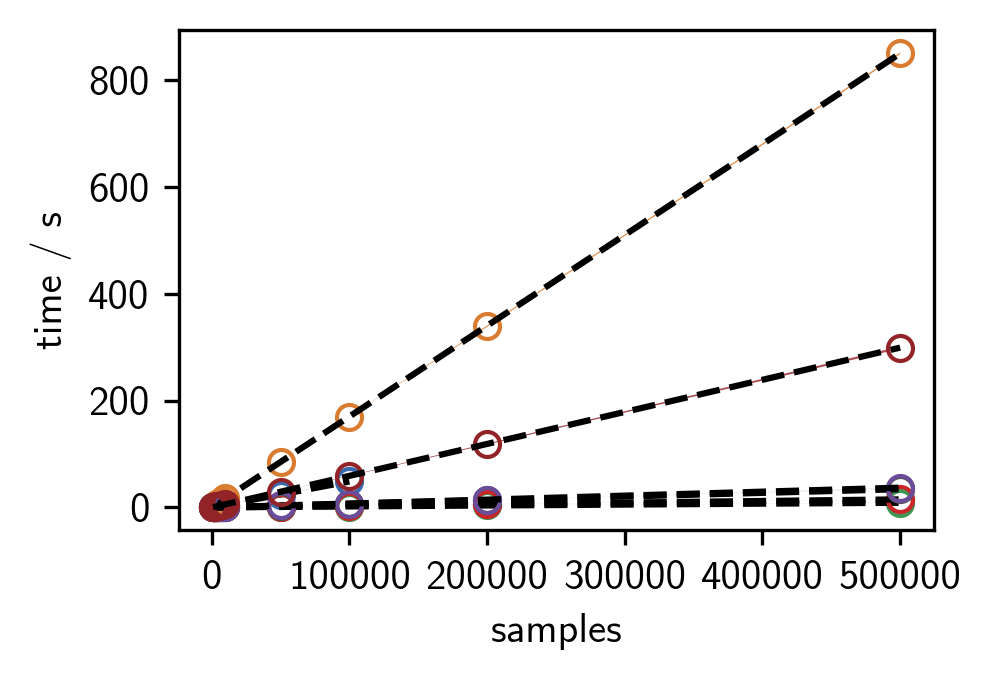

In [22]:
fig, ax = plt.subplots()
_, _, line, _, b = plot_times(times_naive_ds, ax=ax)
_, _, line2, _, b2 = plot_times(times_naive_ds_cdist, ax=ax)
_, _, line2, _, b3 = plot_times(times_naive_mm, ax=ax)
_, _, line, _, b4 = plot_times(times_naive_mm_map, ax=ax)
_, _, line, _, b5 = plot_times(times_naive_kd, ax=ax)
_, _, line, _, b6 = plot_times(times_naive_kd40, ax=ax)
_, _, line, _, b7 = plot_times(times_naive_kd_multi, ax=ax) #40

[4.55473248e-04 1.00550043e+00] [1.21824436e-05 2.35805376e-03]
[0.00170755 0.99961449] [2.08207720e-05 9.42714177e-04]
[2.73969571e-05 9.65701169e-01] [6.19026222e-06 1.74883449e-02]
[3.1050253e-05 9.9752487e-01] [9.08589901e-07 2.26250167e-03]
[6.27740611e-05 1.00632348e+00] [1.16570170e-06 1.43540185e-03]
[6.26417074e-05 1.01264399e+00] [2.55023600e-06 3.14628449e-03]
[5.38693448e-04 1.00796338e+00] [7.76312189e-06 1.11388130e-03]


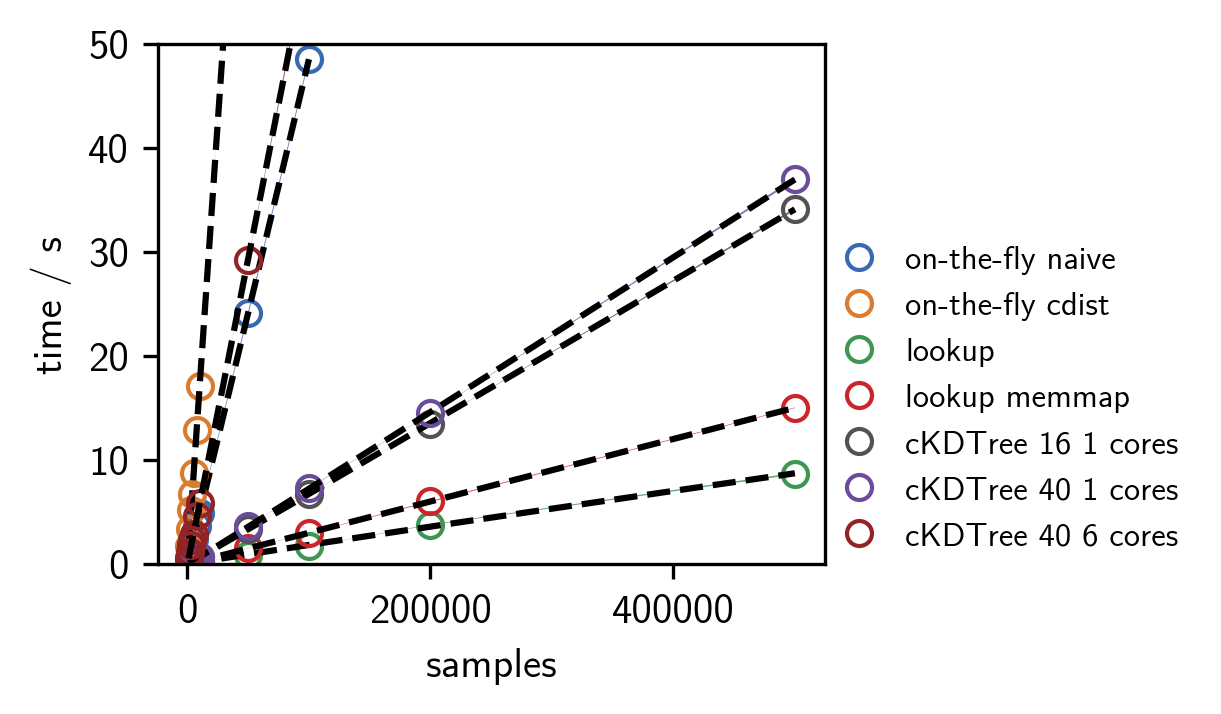

In [45]:
fig, ax = plt.subplots(figsize=(6.50128*0.6, 6.50128*0.5*0.618*1.1))
_, _, line, _, b = plot_times(times_naive_ds, ax=ax)
_, _, line2, _, b2 = plot_times(times_naive_ds_cdist, ax=ax)
_, _, line3, _, b3 = plot_times(times_naive_mm, ax=ax)
_, _, line4, _, b4 = plot_times(times_naive_mm_map, ax=ax)
_, _, line5, _, b5 = plot_times(times_naive_kd, ax=ax)
# _, _, line6, _, b6 = plot_times(times_naive_kd_2, ax=ax)
_, _, line7, _, b7 = plot_times(times_naive_kd40, ax=ax)
_, _, line8, _, b8 = plot_times(times_naive_kd_multi, ax=ax) #40
ax.legend(
    [line[0],
     line2[0],
     line3[0],
     line4[0],
     line5[0],
     # line6[0],
     line7[0],
     line8[0],],
    ['on-the-fly naive', 
    'on-the-fly cdist', 
    'lookup', 
    'lookup memmap', 
    'cKDTree 16 1 cores', 
     # 'cKDTree 16 2 cores',
    'cKDTree 40 1 cores',
    'cKDTree 40 6 cores',
    ],
    frameon=False,
    fontsize=8,
    handlelength=1.2,
    loc=(1, 0)
)
ax.set(**{
    "ylim": (0, 50)
})
fig.tight_layout(pad=0.1)
# fig.savefig(system / "compare.png")
fig.savefig("/home/janjoswig/Documents/Presentation/cnn/figures/compare1.png")

In [87]:
line[0].

<a name="e2" />

# Benchmark environment 2

In [121]:
# Train set preparation
cobj = cnn.CNN(test=genblobs(5000))
cobj.fit(1, 5)
train = cobj.train[0]
labels = cobj.train_labels
dist = cobj.train_dist_matrix

Configuration file found in /home/janjoswig
No train data present, but test data found. Switching data.
Calculating nxn distance matrix for 5000 points
Execution time for call of fit():     0 hours, 0 minutes, 3.3601 seconds
recording: ... 
points              5000
radius_cutoff          1
cnn_cutoff             5
member_cutoff          1
max_clusters        None
n_clusters             2
largest              0.5
noise                  0
time             3.36014
dtype: object


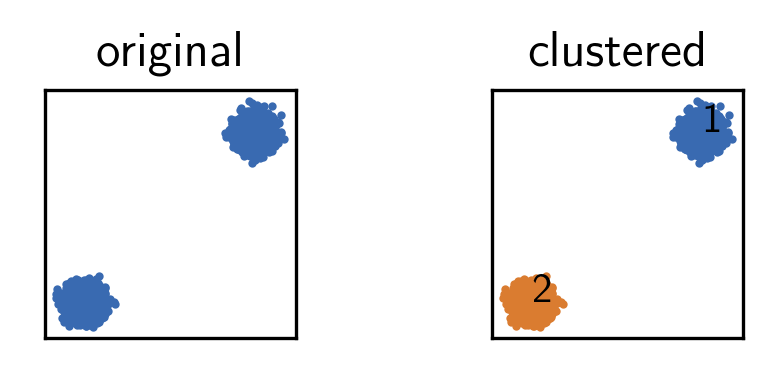

In [122]:
fig, Ax = plt.subplots(1, 2)
cobj.evaluate(ax=Ax[0], ax_props=ax_props, original=True)
cobj.evaluate(ax=Ax[1], ax_props=ax_props)
Ax[0].set_title("original")
Ax[1].set_title("clustered")
fig.tight_layout(pad=0.1)

# Benchmark runs

# ds

In [123]:
# system = Path("qcm07")
system = Path("qcw21")

In [124]:
e2_times_naive_ds = defaultdict(list)

In [129]:
e2_times_naive_ds

defaultdict(list, {})

In [149]:
np.save(system / "e2_times_naive_ds.npy", e2_times_naive_ds)

In [72]:
e2_times_naive_ds = np.load(system / "times_naive_ds.npy", allow_pickle=True).item()

In [130]:
samples = [1000, 2000, 3000]

In [131]:
update_dictlists(
    e2_times_naive_ds,
    benchmark(
        genblobs,
        naive_ds,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_ds,
        check=check_set,
        r=1, c=5
        )
    )

Benchmark mode ds...



# mm

In [136]:
e2_times_naive_mm = defaultdict(list)

In [148]:
np.save(system / "e2_times_naive_mm.npy", e2_times_naive_mm)

In [138]:
e2_times_naive_mm = np.load(system / "e2_times_naive_mm.npy", allow_pickle=True).item()

In [141]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000]
# samples = [1000]

In [142]:
update_dictlists(
    e2_times_naive_mm,
    benchmark(
        genblobs,
        naive_mm,
        dist=dist,
        distanceprovider=d_cdist,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_naive_mm,
        check=check_set,
        r=1, c=5,
        mode='mm'
        )
    )

Benchmark mode mm...



# kd

In [144]:
e2_times_naive_kd = defaultdict(list)

In [147]:
np.save(system / "e2_times_naive_kd.npy", e2_times_naive_mm)

In [138]:
e2_times_naive_kd = np.load(system / "e2_times_naive_kd.npy", allow_pickle=True).item()

In [141]:
# samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000]
# samples = [50000, 100000]
samples = [1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000, 100000]
# samples = [1000]

In [142]:
update_dictlists(
    e2_times_naive_kd,
    benchmark(
        genblobs,
        naive_mm,
        dist=dist,
        distanceprovider=d_cdist,
        samples=samples,
        train=train,
        labels=labels,
        query=get_neighbours_naive_mm,
        check=check_set,
        r=1, c=5,
        mode='mm'
        )
    )

Benchmark mode mm...



[0.02282054 1.00853517] [0.00054862 0.00307435]
[5.50278406e-04 1.00660785e+00] [2.93150958e-05 4.69652902e-03]


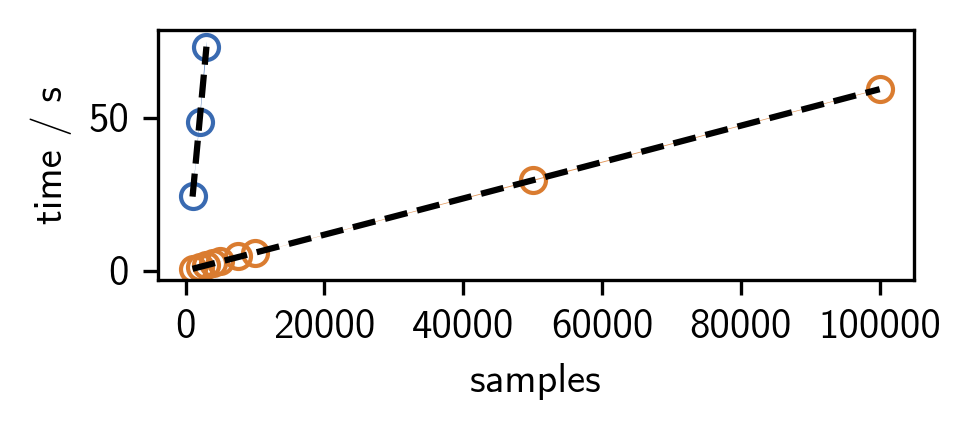

In [143]:
fig, ax = plt.subplots()
_, _, line, _, b = plot_times(e2_times_naive_ds, ax=ax)
_, _, line2, _, b2 = plot_times(e2_times_naive_mm, ax=ax)

# memmap

In [146]:
ls -ltr

total 2452
-rw-r--r-- 1 janjoswig zedat  148187 Aug  5 14:46 demo-benchmark.ipynb
drwxr-xr-x 4 janjoswig zedat     148 Aug  5 14:46 T460/
-rw-r--r-- 1 janjoswig zedat 2173295 Sep  9 17:33 demo-benchmark-dev.ipynb
drwxr-xr-x 2 janjoswig zedat      36 Sep  9 18:06 qcm07/
drwxr-xr-x 4 janjoswig zedat    4096 Sep 10 11:09 qcw21/
-rw-r--r-- 1 janjoswig zedat  180159 Sep 10 11:10 benchmark-predict.ipynb


In [150]:
!mkdir stream

In [155]:
np.shape(dist)

(5000, 5000)

In [156]:
np.save("stream/dist.npy", dist)

In [158]:
ls -ltr stream

total 195316
-rw-r--r-- 1 janjoswig zedat 200000128 Sep 10 12:29 dist.npy


In [159]:
streameddist = np.load("stream/dist.npy", 'r')

In [160]:
memdist = np.load("stream/dist.npy")

In [164]:
test = np.random.uniform(0, 1, (int(1e6), 3))
train = np.random.uniform(0, 1, (int(1e3), 3))

In [165]:
np.shape(test)

(1000000, 3)

In [166]:
train

array([[0.48665156, 0.5984283 , 0.26779115],
       [0.2984888 , 0.72799449, 0.20522081],
       [0.96862172, 0.31150789, 0.86601415],
       ...,
       [0.69131583, 0.66477186, 0.18129476],
       [0.04195839, 0.88489151, 0.81463953],
       [0.90508547, 0.08462161, 0.68881213]])

In [172]:
chunksize = 100
chunks = np.ceil(len(train) / chunksize).astype(int)

In [168]:
D = cdist(train, train)

In [171]:
E = np.zeros((len(train), len(train)))

In [174]:
for chunk in range(chunks):
    E[chunk*chunksize : (chunk+1)*chunksize] = cdist(train[chunk*chunksize : (chunk+1)*chunksize], train)

In [177]:
np.allclose(E, D)

True

In [179]:
%xdel D